In [1]:
import pandas as pd
import numpy as np

In this notebook we are going to generate data using the **numpy.random** module as toy example of regression tabular data sample

# Feature generation

In [2]:
n_samples = 100_000

## Numerical features
we are going to create 10 numerical features 

- 5 with gamma distributions (positive and long tail)
- 5 with beta distributions

### Gamma distributed

In [3]:
k = [0.5, 1, 2, 3, 0.1] 
scale = [0.5, 1, 2, 3, 10 ]
numeric_feats_gamma = pd.DataFrame(
    data=np.random.gamma(k, scale, size=(n_samples, len(k))),
    columns=[f'numeric_{i}' for i in range(len(k))]
)

numeric_feats_gamma.head()

,numeric_0,numeric_1,numeric_2,numeric_3,numeric_4
0,0.198528,1.241497,4.696066,11.830818,2.279061e-02
1,0.143972,2.159283,4.076755,6.600040,3.775116e-10
2,0.121537,0.374257,6.227243,7.745228,2.007561e+00
3,1.725056,1.172090,5.839338,8.856516,9.588456e-01
4,0.665196,0.487660,4.155012,11.517602,1.596134e-03


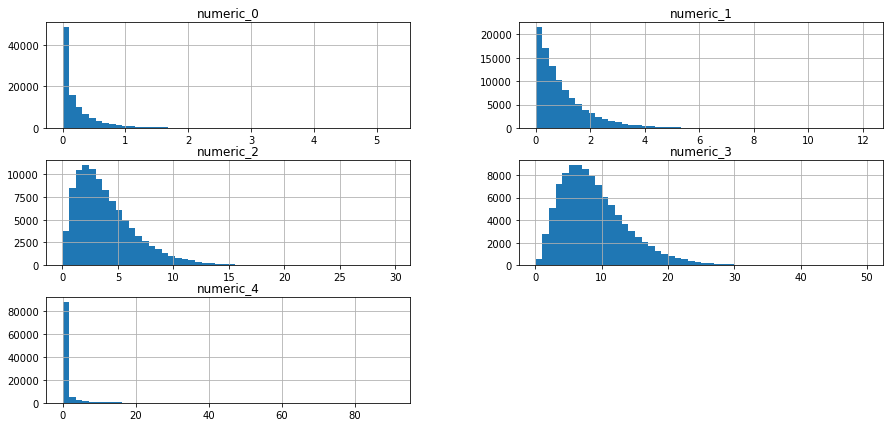

In [4]:
numeric_feats_gamma.hist(figsize=(15, 7), bins=50);

### Beta distributed

In [5]:
alpha = [1, 20, 0.1, 10, 5]
beta = [7, 1, 1, 0.4, 4]
numeric_feats_beta = pd.DataFrame(
    data=np.random.beta(alpha, beta, size=(n_samples, len(scale))),
    columns=[f'numeric_{len(k)+i}' for i in range(len(scale))]
)

numeric_feats_beta.head()

,numeric_5,numeric_6,numeric_7,numeric_8,numeric_9
0,0.080009,0.946947,3.799003e-08,0.999981,0.729404
1,0.053959,0.928054,6.577032e-06,0.997312,0.466690
2,0.031287,0.981738,8.008769e-01,0.976252,0.764562
3,0.060675,0.998299,1.273418e-05,0.999931,0.436125
4,0.186576,0.991971,5.740028e-03,0.964936,0.320067


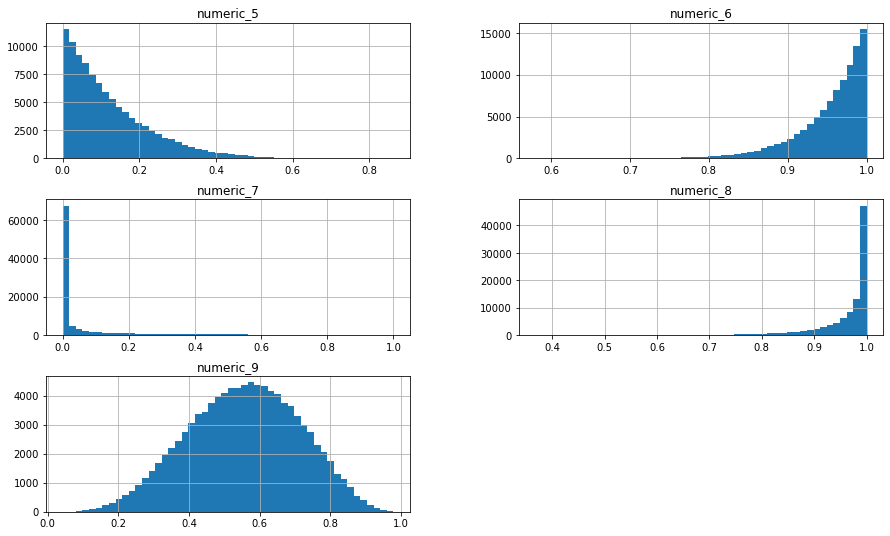

In [6]:
numeric_feats_beta.hist(figsize=(15, 9), bins=50);

In [7]:
numeric_feats = pd.concat([numeric_feats_gamma, numeric_feats_beta], axis=1)
numeric_feats.head()

,numeric_0,numeric_1,numeric_2,numeric_3,numeric_4,numeric_5,numeric_6,numeric_7,numeric_8,numeric_9
0,0.198528,1.241497,4.696066,11.830818,2.279061e-02,0.080009,0.946947,3.799003e-08,0.999981,0.729404
1,0.143972,2.159283,4.076755,6.600040,3.775116e-10,0.053959,0.928054,6.577032e-06,0.997312,0.466690
2,0.121537,0.374257,6.227243,7.745228,2.007561e+00,0.031287,0.981738,8.008769e-01,0.976252,0.764562
3,1.725056,1.172090,5.839338,8.856516,9.588456e-01,0.060675,0.998299,1.273418e-05,0.999931,0.436125
4,0.665196,0.487660,4.155012,11.517602,1.596134e-03,0.186576,0.991971,5.740028e-03,0.964936,0.320067


## Categorical features
We generate 2 categorical features 
- One with 2 categories 
- One with 5 categories

In [8]:
cat_0 = np.random.choice(2, p=(0.4, 0.6), size=(n_samples))

n_cats_1 = 5
p_cat_1 = np.random.dirichlet(
    np.random.uniform(0, 4, size=n_cats_1)
)
cat_1 = np.random.choice(n_cats_1, p=p_cat_1, size=(n_samples))

categ_feats = pd.DataFrame({
    'categ_0': cat_0,
    'categ_1': cat_1
})

categ_feats.head()

,categ_0,categ_1
0,0,0
1,0,2
2,0,4
3,0,1
4,1,0


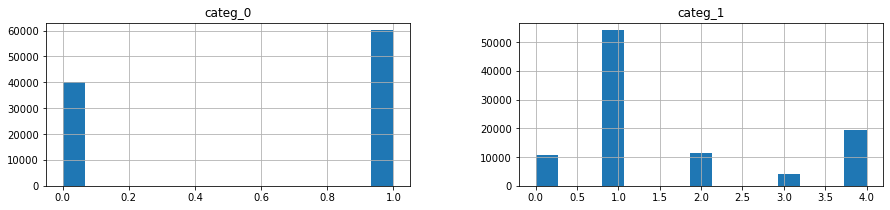

In [9]:
categ_feats.hist(figsize=(15, 3), bins=n_cats_1+10);

In [10]:
feats = pd.concat([numeric_feats, categ_feats], axis=1)
feats.head()

,numeric_0,numeric_1,numeric_2,numeric_3,numeric_4,numeric_5,numeric_6,numeric_7,numeric_8,numeric_9,categ_0,categ_1
0,0.198528,1.241497,4.696066,11.830818,2.279061e-02,0.080009,0.946947,3.799003e-08,0.999981,0.729404,0,0
1,0.143972,2.159283,4.076755,6.600040,3.775116e-10,0.053959,0.928054,6.577032e-06,0.997312,0.466690,0,2
2,0.121537,0.374257,6.227243,7.745228,2.007561e+00,0.031287,0.981738,8.008769e-01,0.976252,0.764562,0,4
3,1.725056,1.172090,5.839338,8.856516,9.588456e-01,0.060675,0.998299,1.273418e-05,0.999931,0.436125,0,1
4,0.665196,0.487660,4.155012,11.517602,1.596134e-03,0.186576,0.991971,5.740028e-03,0.964936,0.320067,1,0


# Target data
We use semi linear model generation process

In [11]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
numerical_features = [f'numeric_{i}' for i in range(10)]
categorical_features = [f'categ_{i}' for i in range(2)]
features = numerical_features + categorical_features

In [13]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ])

#we add this only to add something in the final column transformer for the categ feats
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ])

preprocessor = ColumnTransformer(       
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)]
)

preprocessor.fit(feats)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['numeric_0', 'numeric_1', 'numeric_2',
                                  'numeric_3', 'numeric_4', 'numeric_5',
                                  'numeric_6', 'numeric_7', 'numeric_8',
                                  'numeric_9']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant'))]),
                                 ['categ_0', 'categ_1'])])

In [14]:
transf_feats = pd.DataFrame(
    preprocessor.transform(feats), 
    columns=features
)

transf_feats.head()

,numeric_0,numeric_1,numeric_2,numeric_3,numeric_4,numeric_5,numeric_6,numeric_7,numeric_8,numeric_9,categ_0,categ_1
0,-0.143362,0.244884,0.245423,0.544624,-0.304425,-0.406668,-0.121221,-0.458778,0.676937,1.105795,0.0,0.0
1,-0.296680,1.168121,0.026976,-0.465522,-0.311485,-0.643439,-0.536523,-0.458745,0.629991,-0.568321,0.0,2.0
2,-0.359731,-0.627506,0.785507,-0.244368,0.310386,-0.849506,0.643558,3.564741,0.259485,1.329833,0.0,4.0
3,4.146636,0.175065,0.648683,-0.029761,-0.014468,-0.582394,1.007591,-0.458715,0.676059,-0.763094,0.0,1.0
4,1.168114,-0.513430,0.054579,0.484137,-0.310990,0.561904,0.868492,-0.429941,0.060415,-1.502660,1.0,0.0


In [15]:
transf_feats[numerical_features].shape

(100000, 10)

In [16]:
loc_0 = np.random.uniform(-1, 1, size=len(numerical_features))
loc_1 = np.random.uniform(-1, 1, size=len(numerical_features))

This is the epistemic uncertinty

In [24]:
std = 0.02

a_0 = np.random.normal(loc_0, std, size=(n_samples, len(numerical_features)))
a_1 = np.random.normal(loc_1, std, size=(n_samples, len(numerical_features)))
a = np.concatenate([a_0.reshape(n_samples,-1, 1), a_1.reshape(n_samples,-1, 1)], axis=2)
a_combined = a[feats.index, :, feats['categ_0']]
linear_part = (feats[numerical_features]*a_combined).sum(axis=1)

In [39]:
biases = np.random.uniform(-1, 1, size=5)
biases

array([-0.04692343,  0.05276279, -0.73672342, -0.42314256,  0.66678846])

In [44]:
biases = np.random.uniform(-1, 1, size=5)

data = feats.copy(deep=True)
data['target'] = linear_part + biases[feats['categ_1']]

<AxesSubplot:>

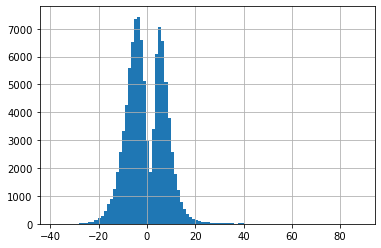

In [45]:
data['target'].hist(bins=100)

In [46]:
data.to_csv('./data/data.csv')